#History of Tsunamis

A tsunami (from Japanese: 津波, "harbour wave"; English pronunciation: /tsuːˈnɑːmi/) or tidal wave, also known as a seismic sea wave, is a series of waves in a water body caused by the displacement of a large volume of water, generally in an ocean or a large lake. Earthquakes, volcanic eruptions and other underwater explosions (including detonations of underwater nuclear devices), landslides, glacier calvings, meteorite impacts and other disturbances above or below water all have the potential to generate a tsunami. Unlike normal ocean waves which are generated by wind, or tides which are generated by the gravitational pull of the Moon and Sun, a tsunami is generated by the displacement of water.
[more....][1]


  [1]: https://en.wikipedia.org/wiki/Tsunami

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Read the file
tsunami_data = pd.read_csv('sources.csv', sep=",", header=0, index_col=0)
tsunami_data.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
SOURCE_ID,,,,,,,,,,,,,,,,,,,,,
1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# you can check de ID's, there aren't correlatives. 
# I'm going to make a reset_index

tsunami_data.reset_index(drop=True, inplace=True)
tsunami_data.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,REGION_CODE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,50.0,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Duplicates and NaN values
#Check first the numbers of row
print("Before cleaning: ",tsunami_data.index)

#Drop and clean row to duplicates
tsunami_data.dropna()
tsunami_data.drop_duplicates()

print("After cleaning: ",tsunami_data.index)

#There weren't rows duplicated.

Before cleaning:  RangeIndex(start=0, stop=2582, step=1)
After cleaning:  RangeIndex(start=0, stop=2582, step=1)


### Group by Countries

**Japan** is known for the amount of tsunamis during its history, Nowadays is sadly famous due to 2011 tsunami.

In [5]:
#Group by Countries
tsunami_data['COUNTRY_FRECUENCY'] = tsunami_data.groupby(tsunami_data.COUNTRY)['COUNTRY'].transform('count')
print (tsunami_data['COUNTRY_FRECUENCY'])

0         8.0
1       166.0
2         8.0
3        61.0
4         9.0
        ...  
2577     45.0
2578     73.0
2579    163.0
2580      5.0
2581     73.0
Name: COUNTRY_FRECUENCY, Length: 2582, dtype: float64


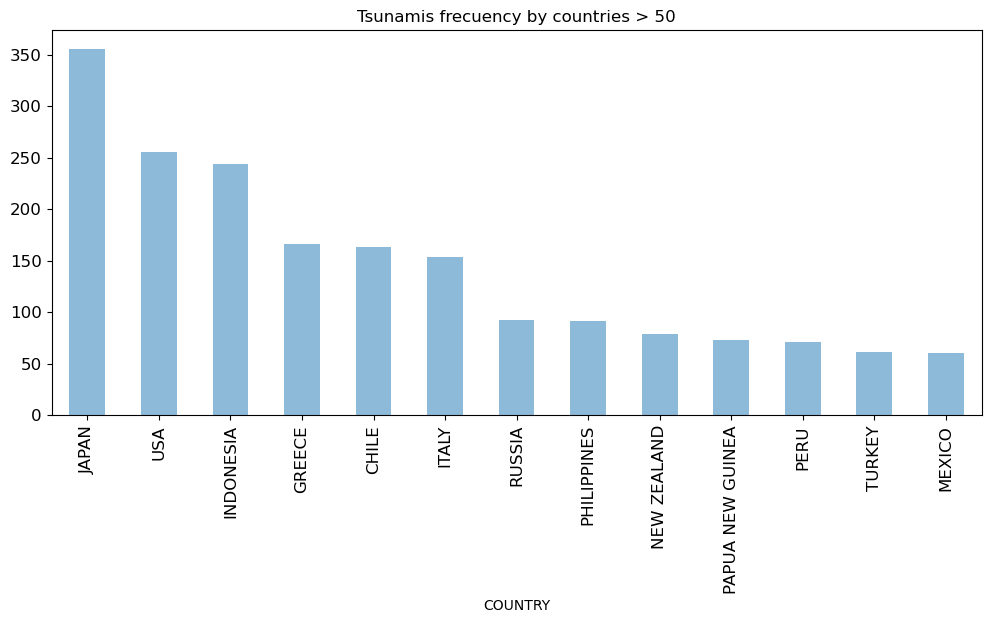

In [6]:
#Frecuency tsunamis by countries
tsunami_data.COUNTRY[tsunami_data.COUNTRY_FRECUENCY > 50].value_counts().plot(kind='bar',
                                             legend=False,
                                             figsize=(12,5),
                                             title="Tsunamis frecuency by countries > 50",
                                             fontsize=12,
                                             alpha=0.5
                                            );

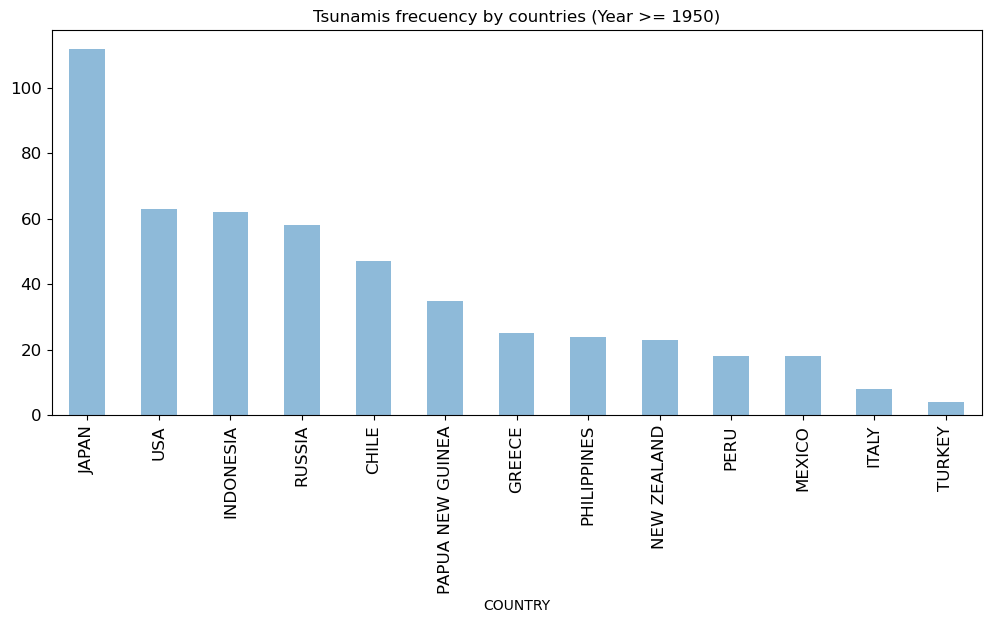

In [7]:
#Tsunamis frecuency (year > 1950)
tsunami_data.COUNTRY[(tsunami_data.YEAR >= 1950) & (tsunami_data.COUNTRY_FRECUENCY > 50)].value_counts().plot(kind='bar',
                                             legend=False,
                                             figsize=(12,5),
                                             title="Tsunamis frecuency by countries (Year >= 1950)",
                                             fontsize=12,
                                             alpha=0.5
                                            );

### Group by Regions

This *dataSet* divide tsunamis by regions. We are going to find something curious, there is a region that has have more recorded tsunamis than Japan along the history.

In [8]:
#Mapping different regions
regions = {77:'West Coast of Africa',
            78:'Central Africa',
            73:'Northeast Atlantic Ocean',
            72:'Northwest Atlantic Ocean',
            70:'Southeast Atlantic Ocean',
            71:'Southwest Atlantic Ocean',
            75:'E. Coast USA and Canada, St Pierre and Miquelon',
            76:'Gulf of Mexico',
            74:'Caribbean Sea',
            40:'Black Sea and Caspian Sea',
            50:'Mediterranean Sea',
            30:'Red Sea and Persian Gulf',
            60:'Indian Ocean (including west coast of Australia)',
            87:'Alaska (including Aleutian Islands)',
            84:'China, North and South Korea, Philippines, Taiwan',
            81:'E. Coast Australia, New Zealand, South Pacific Is.',
            80:'Hawaii, Johnston Atoll, Midway I',
            83:'E. Indonesia (Pacific Ocean) and Malaysia',
            82:'New Caledonia, New Guinea, Solomon Is., Vanuatu',
            86:'Kamchatka and Kuril Islands',
            85:'Japan',
            88:'West Coast of North and Central America',
            89:'West Coast of South America'}


tsunami_data['REGIONS'] = tsunami_data['REGION_CODE'].map(regions)

#Group by Regions
tsunami_data['REGIONS_FRECUENCY'] = tsunami_data.groupby(tsunami_data.REGIONS)['REGIONS'].transform('count')

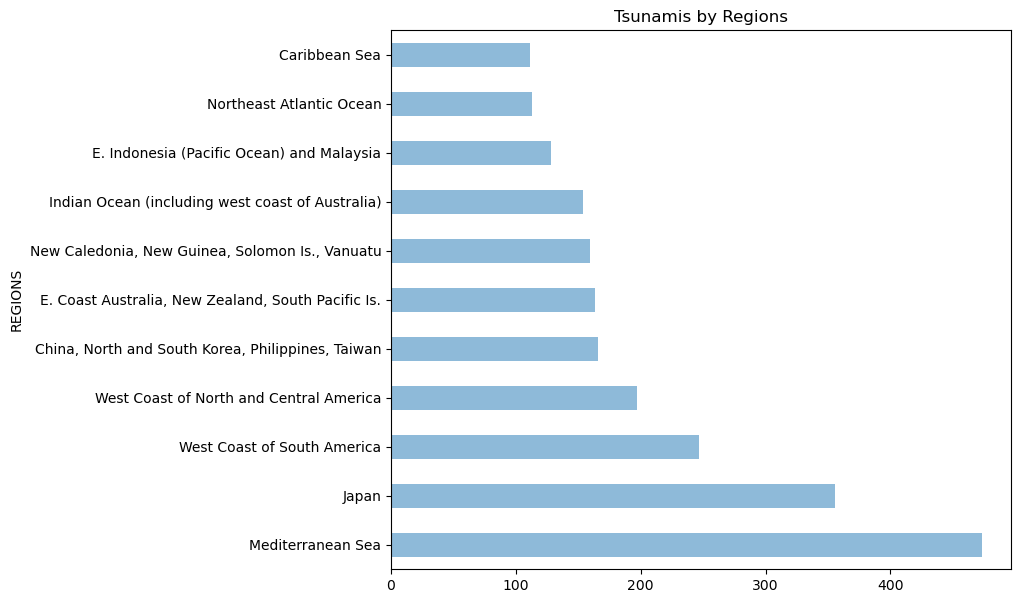

In [9]:
#Frecuency by Regions
tsunami_data.REGIONS[tsunami_data.REGIONS_FRECUENCY > 100].value_counts().plot(kind='barh',
                                              legend=False,
                                              figsize=(8,7),
                                              title="Tsunamis by Regions",
                                              alpha=0.5);

Due to advanced civilitations like Greeck or Romans, in the Mediterranean region exists more recorded data about tsunamis, that was the reason about high level of tsunamis.
With a year filter you can fix the anomaly.

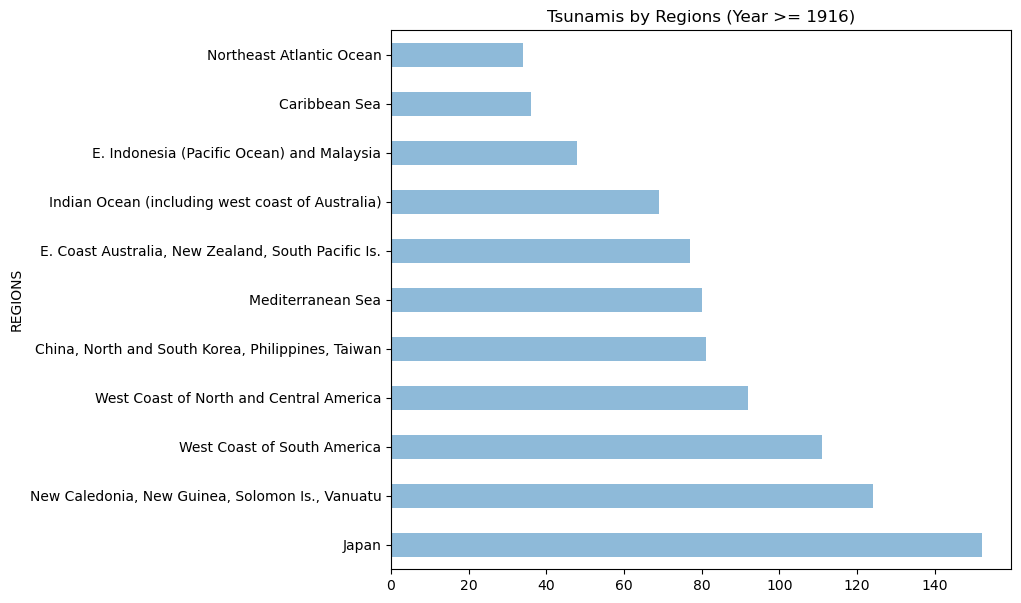

In [10]:
tsunami_data.REGIONS[(tsunami_data.YEAR >= 1916) & (tsunami_data.REGIONS_FRECUENCY > 100)].value_counts().plot(kind='barh',
                                              legend=False,
                                              figsize=(8,7),                                                                                                               
                                              title="Tsunamis by Regions (Year >= 1916)",
                                              alpha=0.5);

###Case Study Spain
Spain has coast in 2 different regions, the next pie show the percentaje of recorded tsunamis in each one. 

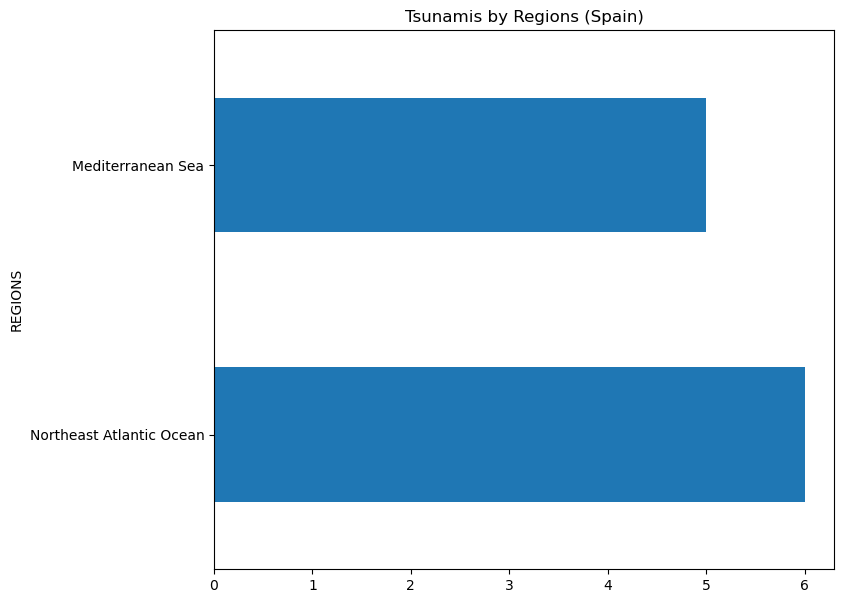

In [11]:
#Case Study (Spain)
tsunami_data.REGIONS[(tsunami_data.COUNTRY == 'SPAIN')].value_counts().plot(kind='barh',
                                            legend=False,
                                            figsize=(8,7),
                                            title="Tsunamis by Regions (Spain)");

### Group by Causes

This *dataSet* divide tsunamis by causes.

In [12]:
#Mapping different causes
causes = {0:'Unknown',
          1:'Earthquake',
          2:'Questionable Earthquake',
          3:'Earthquake and Landslide',
          4:'Volcano and Earthquake',
          5:'Volcano, Earthquake, and Landslide',
          6:'Volcano',
          7:'Volcano and Landslide',
          8:'Landslide',
          9:'Meteorological',
          10:'Explosion',
          11:'Astronomical Tide'}

tsunami_data['CAUSES'] = tsunami_data['CAUSE'].map(causes)

#Group by Causes
tsunami_data['CAUSES_FRECUENCY'] = tsunami_data.groupby(tsunami_data.CAUSES)['CAUSES'].transform('count')

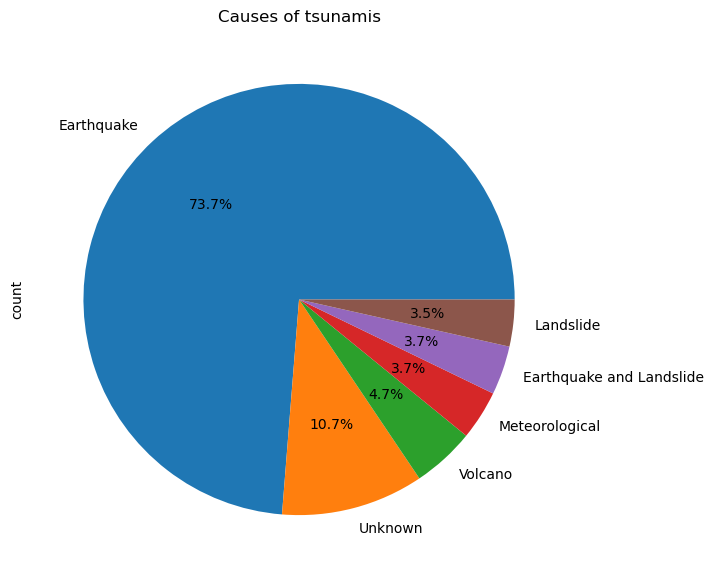

In [13]:
#Causes of tsunamis
tsunami_data.CAUSES[tsunami_data.CAUSES_FRECUENCY >= 50].value_counts().plot(kind='pie',
                                            legend=False,
                                            figsize=(8,7),
                                            title="Causes of tsunamis",
                                            autopct='%.1f%%');

##Conclusion
In next steps I'll study about the veracity of the recorded tsunamis, the intensity and differents effects about them.

In [14]:
#tsunami_data.EVENT_VALIDITY.value_counts()